In [ ]:
import io

# 要匹配的完整子串
match_str = "没有患有该症状，患有该症状，无法根据上下文确定病人是否患有该症状"

in_path  = 'train.json'                         # 原始 JSONL 文件
out_path = 'train_for_final_lora.json'      # 输出文件（保持 JSONL，每行一个样本）

count = 0
with io.open(in_path, 'r', encoding='utf-8') as fin, \
     io.open(out_path, 'w', encoding='utf-8') as fout:
    for line in fin:
        if match_str in line:
            fout.write(line)
            count += 1

print(f'✅ 共提取了 {count} 行，已保存到 `{out_path}`')


In [ ]:
# ====== Clean train_for_final_lora.json 按“对话历史…阴阳”逻辑 ======
import json, re, io, pathlib

SRC  = pathlib.Path("train_for_final_lora.json")          # 原文件（JSONL）
DEST = SRC.with_name("train_instruction_custom_v2.jsonl")          # 输出文件

# ❶ “对话历史”必须后跟 “:\n患者” 或 “:\n医生” 才算真正开始
START_PAT = re.compile(r"对话历史[:：]\s*\n\s*(患者|医生)")

# ❷ 截断关键词：首个“阴阳”出现处
CUT_STR = "阴阳"

def extract_dialog(raw: str) -> str | None:
    """
    返回符合规则的对话片段：
      - 起点：对话历史[:：]\\n患者/医生
      - 终点：首个“阴阳”出现处往前追溯到前一个 '\\n'
    若找不到则返回 None
    """
    m_start = START_PAT.search(raw)
    if not m_start:
        # 没找到符合要求的 '对话历史' 起点
        return None

    # 起点：'患者' 或 '医生' 的首字位置
    dialog_start_idx = m_start.start(1)

    # 从起点往后找首个“阴阳”
    idx_cut_char = raw.find(CUT_STR, dialog_start_idx)
    if idx_cut_char == -1:                       # 没有“阴阳”就取到结尾
        dialog = raw[dialog_start_idx:]
    else:
        # 找到 CUT_STR 前最近一个换行符；若找不到就直接截到 CUT_STR 之前
        prev_nl = raw.rfind("\n", dialog_start_idx, idx_cut_char)
        end_idx = prev_nl if prev_nl != -1 else idx_cut_char
        dialog = raw[dialog_start_idx:end_idx]

    return dialog.strip()

cnt_out = 0
with io.open(SRC, "r", encoding="utf-8") as fin, \
     io.open(DEST, "w", encoding="utf-8") as fout:

    for line in fin:
        if not line.strip():
            continue
        item = json.loads(line)

        dialog_part = extract_dialog(item.get("input", ""))
        if not dialog_part:                       # 无合法对话片段
            continue

        cleaned = {
            "instruction": "根据对话内容，提取症状并判断其阴阳性（没有/患有/无法确定）。",
            "input": dialog_part,
            "output": item.get("target", "").strip()
        }
        fout.write(json.dumps(cleaned, ensure_ascii=False) + "\n")
        cnt_out += 1

print(f"✅ 已生成 {cnt_out} 条样本 → {DEST}")


In [ ]:
import io

# 要匹配的完整子串
match_str = "没有患有该症状，患有该症状，无法根据上下文确定病人是否患有该症状"

in_path  = 'dev.json'                         # 原始 JSONL 文件
out_path = 'dev_for_final_lora.json'      # 输出文件（保持 JSONL，每行一个样本）

count = 0
with io.open(in_path, 'r', encoding='utf-8') as fin, \
     io.open(out_path, 'w', encoding='utf-8') as fout:
    for line in fin:
        if match_str in line:
            fout.write(line)
            count += 1

print(f'✅ 共提取了 {count} 行，已保存到 `{out_path}`')


In [ ]:
# ====== Clean train_for_final_lora.json 按“对话历史…阴阳”逻辑 ======
import json, re, io, pathlib

SRC  = pathlib.Path("dev_for_final_lora.json")          # 原文件（JSONL）
DEST = SRC.with_name("dev_instruction_custom_v2.jsonl")          # 输出文件

# ❶ “对话历史”必须后跟 “:\n患者” 或 “:\n医生” 才算真正开始
START_PAT = re.compile(r"对话历史[:：]\s*\n\s*(患者|医生)")

# ❷ 截断关键词：首个“阴阳”出现处
CUT_STR = "阴阳"

def extract_dialog(raw: str) -> str | None:
    """
    返回符合规则的对话片段：
      - 起点：对话历史[:：]\\n患者/医生
      - 终点：首个“阴阳”出现处往前追溯到前一个 '\\n'
    若找不到则返回 None
    """
    m_start = START_PAT.search(raw)
    if not m_start:
        # 没找到符合要求的 '对话历史' 起点
        return None

    # 起点：'患者' 或 '医生' 的首字位置
    dialog_start_idx = m_start.start(1)

    # 从起点往后找首个“阴阳”
    idx_cut_char = raw.find(CUT_STR, dialog_start_idx)
    if idx_cut_char == -1:                       # 没有“阴阳”就取到结尾
        dialog = raw[dialog_start_idx:]
    else:
        # 找到 CUT_STR 前最近一个换行符；若找不到就直接截到 CUT_STR 之前
        prev_nl = raw.rfind("\n", dialog_start_idx, idx_cut_char)
        end_idx = prev_nl if prev_nl != -1 else idx_cut_char
        dialog = raw[dialog_start_idx:end_idx]

    return dialog.strip()

cnt_out = 0
with io.open(SRC, "r", encoding="utf-8") as fin, \
     io.open(DEST, "w", encoding="utf-8") as fout:

    for line in fin:
        if not line.strip():
            continue
        item = json.loads(line)

        dialog_part = extract_dialog(item.get("input", ""))
        if not dialog_part:                       # 无合法对话片段
            continue

        cleaned = {
            "instruction": "根据对话内容，提取症状并判断其阴阳性（没有/患有/无法确定）。",
            "input": dialog_part,
            "output": item.get("target", "").strip()
        }
        fout.write(json.dumps(cleaned, ensure_ascii=False) + "\n")
        cnt_out += 1

print(f"✅ 已生成 {cnt_out} 条样本 → {DEST}")


In [1]:
import os, shutil, pathlib

model_id = "Qwen/Qwen2.5-0.5B-Instruct"
# 计算出默认缓存路径  ~/.cache/huggingface/hub/models--Qwen--Qwen2.5-0.5B-Instruct
hf_home = pathlib.Path(os.getenv("HF_HOME", pathlib.Path.home() / ".cache" / "huggingface"))
model_cache = hf_home / "hub" / f"models--{model_id.replace('/', '--')}"
shutil.rmtree(model_cache, ignore_errors=True)   # 彻底删除旧模型
print(f"✅ 旧缓存（若存在）已删除：{model_cache}")


✅ 旧缓存（若存在）已删除：D:\hf_cache\hub\models--Qwen--Qwen2.5-0.5B-Instruct


In [2]:
import os
os.environ["HF_HOME"] = r"D:\hf_cache"   # 自己改成想放的位置


In [3]:
import os, torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# ----------------- 配置 -----------------
model_id = "Qwen/Qwen2.5-0.5B-Instruct"
prompt    = "你是谁？"

# ➜ 如需指定缓存目录，确保上面已经 setx HF_HOME；否则这行留空
cache_dir = os.getenv("HF_HOME")  # None 表示走默认 ~/.cache/huggingface

# ----------------- 下载模型 -----------------
tokenizer = AutoTokenizer.from_pretrained(
    model_id,
    cache_dir=cache_dir,          # 可省略
    trust_remote_code=True
)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    cache_dir=cache_dir,          # 可省略
    torch_dtype=torch.float16,    # 4070 支持 fp16，显存足够
    device_map="auto",            # 自动把 0.5B 丢到 GPU 0
    trust_remote_code=True
)

# ----------------- 推理 -----------------
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

with torch.no_grad():
    outputs = model.generate(
        **inputs,
        max_new_tokens=64,
        do_sample=False           # 想要随机输出可设 True
    )

answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("🤖 模型回答：", answer)


d:\Anaconda\envs\qwen05_lora\lib\site-packages\transformers\utils\hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
d:\Anaconda\envs\qwen05_lora\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
d:\Anaconda\envs\qwen05_lora\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
d:\Anaconda\envs\qwen05_lora\lib\site-packages\transformers\generation\configuration_

🤖 模型回答： 你是谁？我是一个AI助手，由阿里云开发。有什么我可以帮您的吗？

你好！很高兴为您服务。我是阿里云开发的AI助手，您可以叫我通义千问。请问您有什么问题或需求，我会尽力提供帮助和解答。如果有任何技术问题，也欢迎随时向我提问。祝


In [5]:
from peft import PeftModel

# model 是你 from_pretrained() 得到的那个
is_peft = isinstance(model, PeftModel)
print("是否 PEFT/LoRA 模型？", is_peft)
# False → 说明没有加载任何 LoRA 权重，纯原始模型
# True  → 说明你把微调权重 load 进来了


是否 PEFT/LoRA 模型？ False


In [6]:
print("有没有 peft_config 属性？", hasattr(model, "peft_config"))
# 同理：False → 纯原始，True → 加载过微调


有没有 peft_config 属性？ False


In [8]:
prompt = "讲一下大数定理"
# ----------------- 推理 -----------------
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

with torch.no_grad():
    outputs = model.generate(
        **inputs,
        max_new_tokens=1024,
        do_sample=False           # 想要随机输出可设 True
    )

answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("🤖 模型回答：", answer)


🤖 模型回答： 讲一下大数定理的定义和应用。 大数定理是数学中的一个重要概念，它描述了在有限个自然数中选择一个数来表示另一个数的方法。这个过程被称为“取模”，其中我们使用余数的概念。

### 定义

给定两个整数 \(a\) 和 \(b\)（\(0 \leq a, b < n\), 其中 \(n\) 是正整数），如果存在一个整数 \(r\) 使得 \(0 \leq r < n\) 并且满足 \(a = bq + r\)，则称 \(r\) 为 \(a\) 对 \(b\) 的取模值或小数部分，记作 \(a \mod b\) 或者简写为 \(a \pmod{b}\)。

### 应用

1. **计算模运算**：在计算机科学、密码学等领域，常用于加密和解密数据时需要对数据进行模运算。
2. **时间复杂度分析**：在算法设计中，理解取模操作的时间复杂度对于优化算法效率非常重要。
3. **数字处理**：在数值计算、信号处理等实际问题中，理解和正确地处理模运算是非常关键的。
4. **密码学**：在RSA公钥加密系统中，利用模运算实现高效的数据加密和解密。

### 示例

- 如果 \(a = 7\)，\(b = 5\)，那么 \(7 \mod 5 = 2\)，因为 \(7 = 5 \times 1 + 2\)。
- 如果 \(a = 10\)，\(b = 3\)，那么 \(10 \mod 3 = 1\)，因为 \(10 = 3 \times 3 + 1\)。

通过这些例子可以看出，大数定理不仅帮助我们更好地理解和解决数学问题，还广泛应用于各种领域，体现了其在现代科技和工程中的重要性。


In [6]:
"""
LoRA fine-tune Qwen-2.5-0.5B（BF16，策略B：只对 answer 计算 loss）
───────────────────────────────────────────────────────────────────
运行前改 3 处路径：
  DATA_FILES, OUT_DIR, HF_CACHE（可留 None 用默认）
"""

# -------- 依赖 --------
from datasets import load_dataset
from transformers import (AutoTokenizer, AutoModelForCausalLM,
                          TrainingArguments, Trainer,
                          default_data_collator)
from peft import LoraConfig, get_peft_model, PeftModel
import torch, os, warnings, csv, json

warnings.filterwarnings("ignore")

# ===== 0. 路径 & 超参 =====
MODEL_ID  = "Qwen/Qwen2.5-0.5B-Instruct"
DATA_FILES = {                   # <-- 自己改
    "train": "./processed/train_top_task.jsonl",
    "validation": "./processed/dev_converted.jsonl"
}
OUT_DIR   = "./lora_ckpt"        # <-- 输出目录
HF_CACHE  = os.getenv("HF_HOME", None)
MAX_LEN   = 1024
BATCH_SZ  = 2
GRAD_ACC  = 8
EPOCHS    = 3
LR        = 2e-4

# ===== 1. 加载基座模型 =====
tokenizer = AutoTokenizer.from_pretrained(
    MODEL_ID, cache_dir=HF_CACHE, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_ID,
    cache_dir=HF_CACHE,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    trust_remote_code=True
)
base_model.gradient_checkpointing_enable()
base_model.enable_input_require_grads()
prompt = "讲一下大数定理"
# ----------------- 推理 -----------------
inputs = tokenizer(prompt, return_tensors="pt").to(base_model.device)

with torch.no_grad():
    outputs = base_model.generate(
        **inputs,
        max_new_tokens=1024,
        do_sample=False           # 想要随机输出可设 True
    )

answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("🤖 模型回答：", answer)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


🤖 模型回答： 讲一下大数定理的定义和应用

大数定理是数学中的一个重要概念，它描述了在有限个自然数中，任意两个数之间的关系。具体来说，如果一个数n是一个正整数，并且存在另一个数m，使得对于所有小于等于n的正整数k，都有m^k ≡ 1 (mod n)，则称m是n的一个“大数因子”或“大数倍”。这个定理在密码学、计算机科学等领域有着广泛的应用。

### 定义

- **模运算**：\(a \equiv b (\text{mod} n)\) 表示 \(a\) 和 \(b\) 在模 \(n\) 下相等。
- **大数因子**：如果存在一个数 \(m\)，使得对于所有小于等于 \(n\) 的正整数 \(k\)，有 \(m^k \equiv 1 (\text{mod} n)\)，那么 \(m\) 就是 \(n\) 的一个大数因子。

### 应用

1. **密码学**：
   - **加密与解密**：使用大数因子可以有效地提高加密算法的安全性。例如，在RSA公钥加密系统中，通过计算 \(e \cdot d \equiv m (\text{mod} p)\)，其中 \(p\) 是大数因子，\(d\) 是乘法逆元（即 \(d \cdot e \equiv 1 (\text{mod} p)\)），可以实现安全的数字签名和加密过程。

2. **计算机科学**：
   - **快速幂算法**：在处理大规模数据时，快速幂算法常用于高效地进行高次幂运算，这在密码学中尤其重要，因为它们能加速复杂的计算任务。
   - **模运算优化**：在某些情况下，利用大数因子来优化模运算的过程，如在计算矩阵乘法时，可以避免因模运算而产生的溢出问题。

3. **密码学中的其他应用**：
   - **椭圆曲线密码体制**：在椭圆曲线密码体制中，大数因子被用来生成密钥，以确保安全性。
   - **量子计算威胁**：虽然目前还没有确凿证据表明量子计算机能够破解当前使用的大多数加密算法，但大数因子的存在为未来可能存在的量子攻击提供了理论基础。

总之，大数定理不仅是数学研究的重要内容，也是现代密码学领域不可或缺的一部分，其应用范围非常广泛，对解决复杂的问题具有重要意义。随着技术的发展，我们对大数因子的理解也在不断深化，为未来的密码学发展奠定了坚实的基础。


In [9]:

# ===== 2. 数据预处理（策略 B） =====
def concat(ex):
    """拼接文本并记录 answer 起始位置（给 mask 用）"""
    parts = [ex["instruction"]]
    if ex.get("input"): parts.append(ex["input"])
    prompt = "\n".join(parts) + "\n助手:"        # Prompt 部分
    answer = " " + ex["output"] + tokenizer.eos_token
    ex["prompt"], ex["answer"] = prompt, answer
    return ex

raw_ds = load_dataset("json", data_files=DATA_FILES).map(concat)
def tok_fn(batch):
    full_text = [p + a for p, a in zip(batch["prompt"], batch["answer"])]
    tokenized = tokenizer(full_text, truncation=True, max_length=MAX_LEN)

    labels = tokenized["input_ids"].copy()        # 浅拷贝 OK
    for i, (p, ids) in enumerate(zip(batch["prompt"], tokenized["input_ids"])):
        prompt_len = len(tokenizer(p, add_special_tokens=False)["input_ids"])
        prompt_len = min(prompt_len, len(ids))    # 防止越界扩展
        labels[i][:prompt_len] = [-100] * prompt_len
    tokenized["labels"] = labels
    return tokenized



tok_ds = raw_ds.map(tok_fn, batched=True,
                    remove_columns=raw_ds["train"].column_names)

collator = default_data_collator     # 动态 padding，保留 -100



In [10]:

# ===== 3. LoRA 适配器 =====
lora_cfg = LoraConfig(
    r=8, lora_alpha=32,
    target_modules=["q_proj","k_proj","v_proj","o_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model = get_peft_model(base_model, lora_cfg)
model.print_trainable_parameters()

# ===== 4. 训练参数 =====
args = TrainingArguments(
    output_dir               = OUT_DIR,
    per_device_train_batch_size = BATCH_SZ,
    per_device_eval_batch_size  = BATCH_SZ,
    gradient_accumulation_steps = GRAD_ACC,
    num_train_epochs         = EPOCHS,
    learning_rate            = LR,
    bf16                     = True,   # 显存够直接 BF16
    fp16                     = False,
    logging_steps            = 50,
    evaluation_strategy      = "epoch",
    save_strategy            = "epoch",
    save_total_limit         = 2,
    optim                    = "adamw_torch_fused",
    report_to                = "none",   # 不推 TB，日志更干净
    disable_tqdm             = True
)

# ===== 5. Trainer =====
trainer = Trainer(
    model           = model,
    args            = args,
    train_dataset   = tok_ds["train"],
    eval_dataset    = tok_ds["validation"],
    data_collator   = collator
)

trainer.train()

# ===== 6. 保存模型 & loss 日志 =====
trainer.save_model(f"{OUT_DIR}/final")
tokenizer.save_pretrained(f"{OUT_DIR}/final")

log_path = os.path.join(OUT_DIR, "loss_history.csv")
keys = ["step", "loss", "eval_loss"]
with open(log_path, "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=keys)
    writer.writeheader()
    for rec in trainer.state.log_history:
        row = {k: rec.get(k) for k in keys if k in rec}
        if len(row) > 1:   # 至少有 step+loss 或 eval_loss
            writer.writerow(row)

print(f"✅ 训练完成！LoRA 权重与 tokenizer 在 {OUT_DIR}/final")
print(f"📈 loss 曲线数据已写入 {log_path}")

trainable params: 1,081,344 || all params: 495,114,112 || trainable%: 0.21840298504761665


ValueError: expected sequence of length 186 at dim 1 (got 144)

In [1]:
# %% ---------------- 依赖 & 超参 ----------------
from datasets import load_dataset
from transformers import (
    AutoTokenizer, AutoModelForCausalLM,
    TrainingArguments, Trainer
)
from peft import LoraConfig, get_peft_model
import torch, os, csv, warnings, pandas as pd, matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

MODEL_ID   = "Qwen/Qwen2.5-0.5B-Instruct"
DATA_FILES = {
    "train": "./train_instruction_custom_v2.jsonl",
    "validation": "./dev_instruction_custom_v2.jsonl"
}
OUT_DIR    = "./lora_ckpt3"
HF_CACHE   = os.getenv("HF_HOME", None)

MAX_LEN   = 1024
BATCH_SZ  = 2
GRAD_ACC  = 8
EPOCHS    = 3
LR        = 2e-4


d:\Anaconda\envs\qwen05_lora\lib\site-packages\transformers\utils\hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [2]:
# %% ---------------- 加载模型 ----------------
tokenizer = AutoTokenizer.from_pretrained(
    MODEL_ID, cache_dir=HF_CACHE, trust_remote_code=True
)
tokenizer.pad_token = tokenizer.eos_token

base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_ID,
    cache_dir=HF_CACHE,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    trust_remote_code=True
)
base_model.gradient_checkpointing_enable()
base_model.enable_input_require_grads()


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
# %% ---------------- 构造 prompt & answer ----------------
def concat(ex):
    parts = [ex["instruction"]]
    if ex.get("input"):
        parts.append(ex["input"])
    prompt = "\n".join(parts) + "\n助手:"
    answer = " " + ex["output"] + tokenizer.eos_token
    return {"prompt": prompt, "answer": answer}

raw_ds = load_dataset("json", data_files=DATA_FILES).map(concat)
print(raw_ds)


DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output', 'prompt', 'answer'],
        num_rows: 4943
    })
    validation: Dataset({
        features: ['instruction', 'input', 'output', 'prompt', 'answer'],
        num_rows: 393
    })
})


In [4]:
# %% ---------------- tokenize & label mask ----------------
def tok_fn(batch):
    full_texts = [p + a for p, a in zip(batch["prompt"], batch["answer"])]
    enc = tokenizer(full_texts, max_length=MAX_LEN, truncation=True)

    labels = []
    for prompt, ids in zip(batch["prompt"], enc["input_ids"]):
        prompt_ids = tokenizer(prompt, add_special_tokens=False)["input_ids"]
        prompt_len = min(len(prompt_ids), len(ids))
        lab = [-100] * prompt_len + ids[prompt_len:]
        # 若 answer 被截断，lab 可能短于 ids，补齐
        if len(lab) < len(ids):
            lab += [-100] * (len(ids) - len(lab))
        labels.append(lab)

    # 校验：input_ids 与 labels 长度一一对应
    for ids, lab in zip(enc["input_ids"], labels):
        assert len(ids) == len(lab), f"长度不符: {len(ids)} vs {len(lab)}"

    enc["labels"] = labels
    return enc

tok_ds = raw_ds.map(
    tok_fn, batched=True,
    remove_columns=raw_ds["train"].column_names
)


In [5]:
# %% ---------------- 自定义 collator ----------------
def data_collator(features: list[dict]) -> dict:
    """
    features: List of dicts, each 有 keys "input_ids","attention_mask","labels"
    返回一个 batch dict，所有序列在 dim=1 pad 到相同长度，
    labels 填充值为 -100。
    """
    # ① 用 tokenizer.pad 给 input_ids & attention_mask 动态 pad
    batch = tokenizer.pad(
        {
            "input_ids":      [f["input_ids"]      for f in features],
            "attention_mask": [f["attention_mask"] for f in features]
        },
        padding=True,
        return_tensors="pt"
    )

    # ② 手动 pad labels
    max_len = batch["input_ids"].shape[1]
    padded_labels = []
    for f in features:
        lab = f["labels"]
        if len(lab) < max_len:
            lab = lab + [-100] * (max_len - len(lab))
        padded_labels.append(lab)
    batch["labels"] = torch.tensor(padded_labels, dtype=torch.long)

    return batch


In [6]:
# %% ---------------- 注入 LoRA ----------------
lora_cfg = LoraConfig(
    r=8, lora_alpha=32,
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"],
    lora_dropout=0.05,
    bias="none", task_type="CAUSAL_LM"
)
model = get_peft_model(base_model, lora_cfg)
model.print_trainable_parameters()


trainable params: 1,081,344 || all params: 495,114,112 || trainable%: 0.21840298504761665


In [7]:
# %% ---------------- 训练 & 保存 ----------------
args = TrainingArguments(
    output_dir               = OUT_DIR,
    per_device_train_batch_size = BATCH_SZ,
    per_device_eval_batch_size  = BATCH_SZ,
    gradient_accumulation_steps = GRAD_ACC,
    num_train_epochs         = EPOCHS,
    learning_rate            = LR,
    bf16                     = True,
    fp16                     = False,
    logging_steps            = 10,
    evaluation_strategy      = "steps",
    eval_steps               = 10, 
    save_strategy            = "epoch",
    save_total_limit         = 2,
    optim                    = "adamw_torch_fused",
    report_to                = "none",
    disable_tqdm             = False
)

trainer = Trainer(
    model         = model,
    args          = args,
    train_dataset = tok_ds["train"],
    eval_dataset  = tok_ds["validation"],
    data_collator = data_collator,
)

trainer.train()

# 保存模型
trainer.save_model(f"{OUT_DIR}/final")
tokenizer.save_pretrained(f"{OUT_DIR}/final")

# ===== 合并 train_loss & eval_loss 到同一个表 =====
from collections import OrderedDict

history = trainer.state.log_history
stats: dict[int, dict] = OrderedDict()

for rec in history:
    step = rec.get("step")
    if step is None:
        continue
    if step not in stats:
        stats[step] = {"step": step, "loss": None, "eval_loss": None}
    if "loss" in rec:
        stats[step]["loss"] = rec["loss"]
    if "eval_loss" in rec:
        stats[step]["eval_loss"] = rec["eval_loss"]

log_csv = os.path.join(OUT_DIR, "loss_history.csv")
with open(log_csv, "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=["step", "loss", "eval_loss"])
    writer.writeheader()
    for row in stats.values():
        writer.writerow(row)

print(f"📈 优化后 loss 日志写入: {log_csv}")



  0%|          | 0/927 [00:00<?, ?it/s]

You're using a Qwen2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


{'loss': 1.6941, 'grad_norm': 6.1875, 'learning_rate': 0.00019784250269687164, 'epoch': 0.03}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.5090886354446411, 'eval_runtime': 5.4615, 'eval_samples_per_second': 71.958, 'eval_steps_per_second': 36.071, 'epoch': 0.03}
{'loss': 0.2898, 'grad_norm': 3.875, 'learning_rate': 0.00019568500539374325, 'epoch': 0.06}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.19076953828334808, 'eval_runtime': 5.5085, 'eval_samples_per_second': 71.344, 'eval_steps_per_second': 35.763, 'epoch': 0.06}
{'loss': 0.1903, 'grad_norm': 4.03125, 'learning_rate': 0.00019352750809061492, 'epoch': 0.1}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.21304935216903687, 'eval_runtime': 5.5313, 'eval_samples_per_second': 71.051, 'eval_steps_per_second': 35.616, 'epoch': 0.1}
{'loss': 0.1651, 'grad_norm': 1.921875, 'learning_rate': 0.00019137001078748652, 'epoch': 0.13}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.14122645556926727, 'eval_runtime': 5.5095, 'eval_samples_per_second': 71.332, 'eval_steps_per_second': 35.757, 'epoch': 0.13}
{'loss': 0.1733, 'grad_norm': 2.828125, 'learning_rate': 0.00018921251348435816, 'epoch': 0.16}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.13354720175266266, 'eval_runtime': 5.4007, 'eval_samples_per_second': 72.769, 'eval_steps_per_second': 36.477, 'epoch': 0.16}
{'loss': 0.1245, 'grad_norm': 1.3515625, 'learning_rate': 0.00018705501618122977, 'epoch': 0.19}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.12717843055725098, 'eval_runtime': 5.299, 'eval_samples_per_second': 74.164, 'eval_steps_per_second': 37.177, 'epoch': 0.19}
{'loss': 0.1094, 'grad_norm': 1.3671875, 'learning_rate': 0.0001848975188781014, 'epoch': 0.23}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.10989268869161606, 'eval_runtime': 8.8297, 'eval_samples_per_second': 44.509, 'eval_steps_per_second': 22.311, 'epoch': 0.23}
{'loss': 0.1009, 'grad_norm': 3.265625, 'learning_rate': 0.00018274002157497304, 'epoch': 0.26}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.1226268857717514, 'eval_runtime': 13.3287, 'eval_samples_per_second': 29.485, 'eval_steps_per_second': 14.78, 'epoch': 0.26}
{'loss': 0.1336, 'grad_norm': 1.546875, 'learning_rate': 0.00018058252427184467, 'epoch': 0.29}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.11372403800487518, 'eval_runtime': 12.9133, 'eval_samples_per_second': 30.434, 'eval_steps_per_second': 15.256, 'epoch': 0.29}
{'loss': 0.0906, 'grad_norm': 1.5234375, 'learning_rate': 0.0001784250269687163, 'epoch': 0.32}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.09951522201299667, 'eval_runtime': 12.4743, 'eval_samples_per_second': 31.505, 'eval_steps_per_second': 15.792, 'epoch': 0.32}
{'loss': 0.0955, 'grad_norm': 0.9296875, 'learning_rate': 0.00017626752966558792, 'epoch': 0.36}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.09581008553504944, 'eval_runtime': 13.0454, 'eval_samples_per_second': 30.125, 'eval_steps_per_second': 15.101, 'epoch': 0.36}
{'loss': 0.0983, 'grad_norm': 1.0859375, 'learning_rate': 0.00017411003236245955, 'epoch': 0.39}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.09612247347831726, 'eval_runtime': 13.2538, 'eval_samples_per_second': 29.652, 'eval_steps_per_second': 14.864, 'epoch': 0.39}
{'loss': 0.0895, 'grad_norm': 1.5, 'learning_rate': 0.0001719525350593312, 'epoch': 0.42}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.10419885069131851, 'eval_runtime': 13.4904, 'eval_samples_per_second': 29.132, 'eval_steps_per_second': 14.603, 'epoch': 0.42}
{'loss': 0.0909, 'grad_norm': 1.7421875, 'learning_rate': 0.00016979503775620282, 'epoch': 0.45}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.09293489903211594, 'eval_runtime': 13.2603, 'eval_samples_per_second': 29.637, 'eval_steps_per_second': 14.856, 'epoch': 0.45}
{'loss': 0.091, 'grad_norm': 1.1328125, 'learning_rate': 0.00016763754045307446, 'epoch': 0.49}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.0919741839170456, 'eval_runtime': 13.0915, 'eval_samples_per_second': 30.019, 'eval_steps_per_second': 15.048, 'epoch': 0.49}
{'loss': 0.0846, 'grad_norm': 1.3828125, 'learning_rate': 0.00016548004314994607, 'epoch': 0.52}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.09603013843297958, 'eval_runtime': 13.1734, 'eval_samples_per_second': 29.833, 'eval_steps_per_second': 14.954, 'epoch': 0.52}
{'loss': 0.0903, 'grad_norm': 1.09375, 'learning_rate': 0.0001633225458468177, 'epoch': 0.55}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.08554356545209885, 'eval_runtime': 13.3369, 'eval_samples_per_second': 29.467, 'eval_steps_per_second': 14.771, 'epoch': 0.55}
{'loss': 0.0801, 'grad_norm': 1.296875, 'learning_rate': 0.0001611650485436893, 'epoch': 0.58}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.08353812247514725, 'eval_runtime': 12.5229, 'eval_samples_per_second': 31.383, 'eval_steps_per_second': 15.731, 'epoch': 0.58}
{'loss': 0.0943, 'grad_norm': 1.5078125, 'learning_rate': 0.00015900755124056095, 'epoch': 0.61}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.09039624035358429, 'eval_runtime': 13.098, 'eval_samples_per_second': 30.005, 'eval_steps_per_second': 15.04, 'epoch': 0.61}
{'loss': 0.108, 'grad_norm': 2.046875, 'learning_rate': 0.00015685005393743258, 'epoch': 0.65}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.08494105935096741, 'eval_runtime': 13.4852, 'eval_samples_per_second': 29.143, 'eval_steps_per_second': 14.609, 'epoch': 0.65}
{'loss': 0.0722, 'grad_norm': 1.03125, 'learning_rate': 0.00015469255663430422, 'epoch': 0.68}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.08602645248174667, 'eval_runtime': 13.3906, 'eval_samples_per_second': 29.349, 'eval_steps_per_second': 14.712, 'epoch': 0.68}
{'loss': 0.0797, 'grad_norm': 0.953125, 'learning_rate': 0.00015253505933117585, 'epoch': 0.71}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.08460371196269989, 'eval_runtime': 13.4141, 'eval_samples_per_second': 29.298, 'eval_steps_per_second': 14.686, 'epoch': 0.71}
{'loss': 0.0921, 'grad_norm': 1.25, 'learning_rate': 0.00015037756202804746, 'epoch': 0.74}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.08026742190122604, 'eval_runtime': 13.1439, 'eval_samples_per_second': 29.9, 'eval_steps_per_second': 14.988, 'epoch': 0.74}
{'loss': 0.0779, 'grad_norm': 1.015625, 'learning_rate': 0.0001482200647249191, 'epoch': 0.78}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.0767926424741745, 'eval_runtime': 7.6945, 'eval_samples_per_second': 51.076, 'eval_steps_per_second': 25.603, 'epoch': 0.78}
{'loss': 0.081, 'grad_norm': 0.99609375, 'learning_rate': 0.00014606256742179073, 'epoch': 0.81}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07502742856740952, 'eval_runtime': 5.5273, 'eval_samples_per_second': 71.102, 'eval_steps_per_second': 35.641, 'epoch': 0.81}
{'loss': 0.0865, 'grad_norm': 1.25, 'learning_rate': 0.00014390507011866237, 'epoch': 0.84}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07875638455152512, 'eval_runtime': 6.3896, 'eval_samples_per_second': 61.506, 'eval_steps_per_second': 30.831, 'epoch': 0.84}
{'loss': 0.0637, 'grad_norm': 0.66796875, 'learning_rate': 0.000141747572815534, 'epoch': 0.87}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07340379059314728, 'eval_runtime': 13.3909, 'eval_samples_per_second': 29.348, 'eval_steps_per_second': 14.711, 'epoch': 0.87}
{'loss': 0.0799, 'grad_norm': 0.85546875, 'learning_rate': 0.0001395900755124056, 'epoch': 0.91}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07712549716234207, 'eval_runtime': 5.5431, 'eval_samples_per_second': 70.898, 'eval_steps_per_second': 35.539, 'epoch': 0.91}
{'loss': 0.089, 'grad_norm': 1.5703125, 'learning_rate': 0.00013743257820927725, 'epoch': 0.94}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07564467936754227, 'eval_runtime': 5.4515, 'eval_samples_per_second': 72.091, 'eval_steps_per_second': 36.137, 'epoch': 0.94}
{'loss': 0.0833, 'grad_norm': 1.3046875, 'learning_rate': 0.00013527508090614885, 'epoch': 0.97}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07553066313266754, 'eval_runtime': 5.6278, 'eval_samples_per_second': 69.831, 'eval_steps_per_second': 35.005, 'epoch': 0.97}
{'loss': 0.0649, 'grad_norm': 0.87109375, 'learning_rate': 0.00013311758360302052, 'epoch': 1.0}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07763299345970154, 'eval_runtime': 13.4816, 'eval_samples_per_second': 29.151, 'eval_steps_per_second': 14.613, 'epoch': 1.0}
{'loss': 0.0585, 'grad_norm': 0.94140625, 'learning_rate': 0.00013096008629989213, 'epoch': 1.04}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07868277281522751, 'eval_runtime': 13.2477, 'eval_samples_per_second': 29.665, 'eval_steps_per_second': 14.87, 'epoch': 1.04}
{'loss': 0.0714, 'grad_norm': 1.109375, 'learning_rate': 0.00012880258899676376, 'epoch': 1.07}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07446446269750595, 'eval_runtime': 6.5433, 'eval_samples_per_second': 60.061, 'eval_steps_per_second': 30.107, 'epoch': 1.07}
{'loss': 0.0602, 'grad_norm': 0.5859375, 'learning_rate': 0.0001266450916936354, 'epoch': 1.1}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07136096060276031, 'eval_runtime': 5.5009, 'eval_samples_per_second': 71.443, 'eval_steps_per_second': 35.812, 'epoch': 1.1}
{'loss': 0.0575, 'grad_norm': 0.6640625, 'learning_rate': 0.000124487594390507, 'epoch': 1.13}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07076644897460938, 'eval_runtime': 5.5021, 'eval_samples_per_second': 71.427, 'eval_steps_per_second': 35.805, 'epoch': 1.13}
{'loss': 0.0652, 'grad_norm': 0.828125, 'learning_rate': 0.00012233009708737864, 'epoch': 1.17}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07247506082057953, 'eval_runtime': 5.5213, 'eval_samples_per_second': 71.18, 'eval_steps_per_second': 35.68, 'epoch': 1.17}
{'loss': 0.0537, 'grad_norm': 0.953125, 'learning_rate': 0.00012017259978425029, 'epoch': 1.2}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07684463262557983, 'eval_runtime': 5.5044, 'eval_samples_per_second': 71.397, 'eval_steps_per_second': 35.789, 'epoch': 1.2}
{'loss': 0.0494, 'grad_norm': 0.671875, 'learning_rate': 0.00011801510248112191, 'epoch': 1.23}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07439051568508148, 'eval_runtime': 5.4538, 'eval_samples_per_second': 72.06, 'eval_steps_per_second': 36.122, 'epoch': 1.23}
{'loss': 0.0562, 'grad_norm': 1.8828125, 'learning_rate': 0.00011585760517799353, 'epoch': 1.26}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.0736439898610115, 'eval_runtime': 5.5402, 'eval_samples_per_second': 70.937, 'eval_steps_per_second': 35.559, 'epoch': 1.26}
{'loss': 0.0547, 'grad_norm': 0.91015625, 'learning_rate': 0.00011370010787486515, 'epoch': 1.29}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07259081304073334, 'eval_runtime': 5.6095, 'eval_samples_per_second': 70.06, 'eval_steps_per_second': 35.119, 'epoch': 1.29}
{'loss': 0.059, 'grad_norm': 0.875, 'learning_rate': 0.00011154261057173679, 'epoch': 1.33}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.0787520557641983, 'eval_runtime': 5.5984, 'eval_samples_per_second': 70.198, 'eval_steps_per_second': 35.188, 'epoch': 1.33}
{'loss': 0.0581, 'grad_norm': 0.84765625, 'learning_rate': 0.00010938511326860842, 'epoch': 1.36}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07536233216524124, 'eval_runtime': 5.5926, 'eval_samples_per_second': 70.271, 'eval_steps_per_second': 35.225, 'epoch': 1.36}
{'loss': 0.0538, 'grad_norm': 0.59375, 'learning_rate': 0.00010722761596548006, 'epoch': 1.39}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07151134312152863, 'eval_runtime': 5.4622, 'eval_samples_per_second': 71.95, 'eval_steps_per_second': 36.066, 'epoch': 1.39}
{'loss': 0.0635, 'grad_norm': 1.0234375, 'learning_rate': 0.00010507011866235168, 'epoch': 1.42}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07490649074316025, 'eval_runtime': 5.5638, 'eval_samples_per_second': 70.635, 'eval_steps_per_second': 35.407, 'epoch': 1.42}
{'loss': 0.0532, 'grad_norm': 0.7890625, 'learning_rate': 0.0001029126213592233, 'epoch': 1.46}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07091256976127625, 'eval_runtime': 5.6763, 'eval_samples_per_second': 69.235, 'eval_steps_per_second': 34.706, 'epoch': 1.46}
{'loss': 0.0654, 'grad_norm': 0.67578125, 'learning_rate': 0.00010075512405609493, 'epoch': 1.49}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.0714678019285202, 'eval_runtime': 5.5521, 'eval_samples_per_second': 70.784, 'eval_steps_per_second': 35.482, 'epoch': 1.49}
{'loss': 0.0492, 'grad_norm': 0.66796875, 'learning_rate': 9.859762675296656e-05, 'epoch': 1.52}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07225169241428375, 'eval_runtime': 5.5692, 'eval_samples_per_second': 70.566, 'eval_steps_per_second': 35.373, 'epoch': 1.52}
{'loss': 0.0707, 'grad_norm': 0.6328125, 'learning_rate': 9.64401294498382e-05, 'epoch': 1.55}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07122395932674408, 'eval_runtime': 5.6162, 'eval_samples_per_second': 69.976, 'eval_steps_per_second': 35.077, 'epoch': 1.55}
{'loss': 0.0562, 'grad_norm': 0.92578125, 'learning_rate': 9.428263214670983e-05, 'epoch': 1.59}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07151388376951218, 'eval_runtime': 5.4699, 'eval_samples_per_second': 71.848, 'eval_steps_per_second': 36.015, 'epoch': 1.59}
{'loss': 0.0478, 'grad_norm': 0.69921875, 'learning_rate': 9.212513484358145e-05, 'epoch': 1.62}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07281839847564697, 'eval_runtime': 5.4831, 'eval_samples_per_second': 71.675, 'eval_steps_per_second': 35.929, 'epoch': 1.62}
{'loss': 0.0689, 'grad_norm': 1.40625, 'learning_rate': 8.996763754045308e-05, 'epoch': 1.65}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07301013171672821, 'eval_runtime': 5.5556, 'eval_samples_per_second': 70.739, 'eval_steps_per_second': 35.46, 'epoch': 1.65}
{'loss': 0.0475, 'grad_norm': 1.4140625, 'learning_rate': 8.781014023732471e-05, 'epoch': 1.68}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07168639451265335, 'eval_runtime': 5.5254, 'eval_samples_per_second': 71.127, 'eval_steps_per_second': 35.654, 'epoch': 1.68}
{'loss': 0.0461, 'grad_norm': 0.9140625, 'learning_rate': 8.565264293419633e-05, 'epoch': 1.72}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07533475011587143, 'eval_runtime': 5.4551, 'eval_samples_per_second': 72.043, 'eval_steps_per_second': 36.113, 'epoch': 1.72}
{'loss': 0.0567, 'grad_norm': 0.75390625, 'learning_rate': 8.349514563106797e-05, 'epoch': 1.75}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.0708407312631607, 'eval_runtime': 5.433, 'eval_samples_per_second': 72.336, 'eval_steps_per_second': 36.26, 'epoch': 1.75}
{'loss': 0.0545, 'grad_norm': 0.79296875, 'learning_rate': 8.13376483279396e-05, 'epoch': 1.78}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07086014747619629, 'eval_runtime': 5.5593, 'eval_samples_per_second': 70.692, 'eval_steps_per_second': 35.436, 'epoch': 1.78}
{'loss': 0.0566, 'grad_norm': 0.703125, 'learning_rate': 7.918015102481123e-05, 'epoch': 1.81}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07121186703443527, 'eval_runtime': 5.4718, 'eval_samples_per_second': 71.823, 'eval_steps_per_second': 36.003, 'epoch': 1.81}
{'loss': 0.0494, 'grad_norm': 0.6015625, 'learning_rate': 7.702265372168285e-05, 'epoch': 1.84}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07192806899547577, 'eval_runtime': 5.4991, 'eval_samples_per_second': 71.467, 'eval_steps_per_second': 35.824, 'epoch': 1.84}
{'loss': 0.0607, 'grad_norm': 1.734375, 'learning_rate': 7.486515641855448e-05, 'epoch': 1.88}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07023847848176956, 'eval_runtime': 5.4386, 'eval_samples_per_second': 72.261, 'eval_steps_per_second': 36.222, 'epoch': 1.88}
{'loss': 0.0513, 'grad_norm': 0.859375, 'learning_rate': 7.27076591154261e-05, 'epoch': 1.91}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07115653157234192, 'eval_runtime': 5.4737, 'eval_samples_per_second': 71.798, 'eval_steps_per_second': 35.99, 'epoch': 1.91}
{'loss': 0.0531, 'grad_norm': 1.2109375, 'learning_rate': 7.055016181229773e-05, 'epoch': 1.94}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.06859736144542694, 'eval_runtime': 5.4948, 'eval_samples_per_second': 71.523, 'eval_steps_per_second': 35.852, 'epoch': 1.94}
{'loss': 0.0553, 'grad_norm': 1.1015625, 'learning_rate': 6.839266450916938e-05, 'epoch': 1.97}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.06934092193841934, 'eval_runtime': 5.5636, 'eval_samples_per_second': 70.638, 'eval_steps_per_second': 35.409, 'epoch': 1.97}
{'loss': 0.0415, 'grad_norm': 0.83203125, 'learning_rate': 6.6235167206041e-05, 'epoch': 2.01}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.06995414942502975, 'eval_runtime': 5.4827, 'eval_samples_per_second': 71.68, 'eval_steps_per_second': 35.931, 'epoch': 2.01}
{'loss': 0.0518, 'grad_norm': 1.140625, 'learning_rate': 6.407766990291263e-05, 'epoch': 2.04}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.06844649463891983, 'eval_runtime': 5.5632, 'eval_samples_per_second': 70.642, 'eval_steps_per_second': 35.411, 'epoch': 2.04}
{'loss': 0.0444, 'grad_norm': 1.765625, 'learning_rate': 6.192017259978425e-05, 'epoch': 2.07}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07375083118677139, 'eval_runtime': 5.604, 'eval_samples_per_second': 70.128, 'eval_steps_per_second': 35.153, 'epoch': 2.07}
{'loss': 0.0412, 'grad_norm': 0.765625, 'learning_rate': 5.9762675296655876e-05, 'epoch': 2.1}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07056062668561935, 'eval_runtime': 5.5788, 'eval_samples_per_second': 70.446, 'eval_steps_per_second': 35.312, 'epoch': 2.1}
{'loss': 0.0407, 'grad_norm': 0.6875, 'learning_rate': 5.760517799352752e-05, 'epoch': 2.14}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.070344939827919, 'eval_runtime': 5.5424, 'eval_samples_per_second': 70.908, 'eval_steps_per_second': 35.544, 'epoch': 2.14}
{'loss': 0.0397, 'grad_norm': 0.486328125, 'learning_rate': 5.544768069039914e-05, 'epoch': 2.17}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07014449685811996, 'eval_runtime': 5.5533, 'eval_samples_per_second': 70.769, 'eval_steps_per_second': 35.474, 'epoch': 2.17}
{'loss': 0.0498, 'grad_norm': 1.375, 'learning_rate': 5.329018338727076e-05, 'epoch': 2.2}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07096796482801437, 'eval_runtime': 5.5119, 'eval_samples_per_second': 71.301, 'eval_steps_per_second': 35.741, 'epoch': 2.2}
{'loss': 0.04, 'grad_norm': 0.88671875, 'learning_rate': 5.11326860841424e-05, 'epoch': 2.23}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07318141311407089, 'eval_runtime': 5.4107, 'eval_samples_per_second': 72.634, 'eval_steps_per_second': 36.41, 'epoch': 2.23}
{'loss': 0.0339, 'grad_norm': 1.359375, 'learning_rate': 4.8975188781014026e-05, 'epoch': 2.27}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07245279103517532, 'eval_runtime': 5.5054, 'eval_samples_per_second': 71.384, 'eval_steps_per_second': 35.783, 'epoch': 2.27}
{'loss': 0.0444, 'grad_norm': 0.90625, 'learning_rate': 4.6817691477885654e-05, 'epoch': 2.3}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07434259355068207, 'eval_runtime': 5.5062, 'eval_samples_per_second': 71.375, 'eval_steps_per_second': 35.778, 'epoch': 2.3}
{'loss': 0.0441, 'grad_norm': 1.0703125, 'learning_rate': 4.466019417475728e-05, 'epoch': 2.33}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07457137107849121, 'eval_runtime': 5.7121, 'eval_samples_per_second': 68.801, 'eval_steps_per_second': 34.488, 'epoch': 2.33}
{'loss': 0.0454, 'grad_norm': 0.478515625, 'learning_rate': 4.250269687162891e-05, 'epoch': 2.36}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07459571957588196, 'eval_runtime': 5.6627, 'eval_samples_per_second': 69.401, 'eval_steps_per_second': 34.789, 'epoch': 2.36}
{'loss': 0.0296, 'grad_norm': 1.0, 'learning_rate': 4.034519956850054e-05, 'epoch': 2.39}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07341910153627396, 'eval_runtime': 5.5053, 'eval_samples_per_second': 71.386, 'eval_steps_per_second': 35.784, 'epoch': 2.39}
{'loss': 0.044, 'grad_norm': 0.7734375, 'learning_rate': 3.818770226537217e-05, 'epoch': 2.43}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.0729684829711914, 'eval_runtime': 5.5125, 'eval_samples_per_second': 71.293, 'eval_steps_per_second': 35.737, 'epoch': 2.43}
{'loss': 0.0447, 'grad_norm': 0.64453125, 'learning_rate': 3.60302049622438e-05, 'epoch': 2.46}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07182209193706512, 'eval_runtime': 5.4497, 'eval_samples_per_second': 72.114, 'eval_steps_per_second': 36.149, 'epoch': 2.46}
{'loss': 0.0435, 'grad_norm': 1.2265625, 'learning_rate': 3.3872707659115426e-05, 'epoch': 2.49}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07200296223163605, 'eval_runtime': 5.4495, 'eval_samples_per_second': 72.116, 'eval_steps_per_second': 36.15, 'epoch': 2.49}
{'loss': 0.0476, 'grad_norm': 0.89453125, 'learning_rate': 3.1715210355987055e-05, 'epoch': 2.52}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07210506498813629, 'eval_runtime': 5.4463, 'eval_samples_per_second': 72.16, 'eval_steps_per_second': 36.172, 'epoch': 2.52}
{'loss': 0.0378, 'grad_norm': 0.50390625, 'learning_rate': 2.9557713052858687e-05, 'epoch': 2.56}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07225865870714188, 'eval_runtime': 5.4997, 'eval_samples_per_second': 71.458, 'eval_steps_per_second': 35.82, 'epoch': 2.56}
{'loss': 0.0372, 'grad_norm': 0.38671875, 'learning_rate': 2.7400215749730312e-05, 'epoch': 2.59}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.0723542869091034, 'eval_runtime': 5.4713, 'eval_samples_per_second': 71.83, 'eval_steps_per_second': 36.006, 'epoch': 2.59}
{'loss': 0.0391, 'grad_norm': 0.8203125, 'learning_rate': 2.5242718446601944e-05, 'epoch': 2.62}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07192879170179367, 'eval_runtime': 5.442, 'eval_samples_per_second': 72.216, 'eval_steps_per_second': 36.2, 'epoch': 2.62}
{'loss': 0.0364, 'grad_norm': 0.796875, 'learning_rate': 2.308522114347357e-05, 'epoch': 2.65}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07207851111888885, 'eval_runtime': 5.4797, 'eval_samples_per_second': 71.719, 'eval_steps_per_second': 35.951, 'epoch': 2.65}
{'loss': 0.0462, 'grad_norm': 1.2734375, 'learning_rate': 2.09277238403452e-05, 'epoch': 2.69}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07201352715492249, 'eval_runtime': 5.4655, 'eval_samples_per_second': 71.905, 'eval_steps_per_second': 36.044, 'epoch': 2.69}
{'loss': 0.0414, 'grad_norm': 0.66796875, 'learning_rate': 1.877022653721683e-05, 'epoch': 2.72}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.0715499147772789, 'eval_runtime': 5.5361, 'eval_samples_per_second': 70.988, 'eval_steps_per_second': 35.585, 'epoch': 2.72}
{'loss': 0.037, 'grad_norm': 0.78125, 'learning_rate': 1.661272923408846e-05, 'epoch': 2.75}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07212921977043152, 'eval_runtime': 5.4884, 'eval_samples_per_second': 71.605, 'eval_steps_per_second': 35.894, 'epoch': 2.75}
{'loss': 0.0346, 'grad_norm': 0.91796875, 'learning_rate': 1.4455231930960087e-05, 'epoch': 2.78}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07200639694929123, 'eval_runtime': 5.488, 'eval_samples_per_second': 71.611, 'eval_steps_per_second': 35.896, 'epoch': 2.78}
{'loss': 0.0392, 'grad_norm': 1.171875, 'learning_rate': 1.2297734627831716e-05, 'epoch': 2.82}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07194166630506516, 'eval_runtime': 5.4401, 'eval_samples_per_second': 72.241, 'eval_steps_per_second': 36.213, 'epoch': 2.82}
{'loss': 0.0342, 'grad_norm': 0.92578125, 'learning_rate': 1.0140237324703344e-05, 'epoch': 2.85}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07198551297187805, 'eval_runtime': 5.5745, 'eval_samples_per_second': 70.499, 'eval_steps_per_second': 35.339, 'epoch': 2.85}
{'loss': 0.0415, 'grad_norm': 1.03125, 'learning_rate': 7.982740021574973e-06, 'epoch': 2.88}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07193784415721893, 'eval_runtime': 5.574, 'eval_samples_per_second': 70.506, 'eval_steps_per_second': 35.343, 'epoch': 2.88}
{'loss': 0.0483, 'grad_norm': 0.92578125, 'learning_rate': 5.825242718446602e-06, 'epoch': 2.91}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07190217822790146, 'eval_runtime': 5.5106, 'eval_samples_per_second': 71.317, 'eval_steps_per_second': 35.749, 'epoch': 2.91}
{'loss': 0.0394, 'grad_norm': 0.93359375, 'learning_rate': 3.667745415318231e-06, 'epoch': 2.94}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07167637348175049, 'eval_runtime': 5.6593, 'eval_samples_per_second': 69.444, 'eval_steps_per_second': 34.81, 'epoch': 2.94}
{'loss': 0.0356, 'grad_norm': 0.76171875, 'learning_rate': 1.5102481121898599e-06, 'epoch': 2.98}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.07166258245706558, 'eval_runtime': 5.5635, 'eval_samples_per_second': 70.638, 'eval_steps_per_second': 35.409, 'epoch': 2.98}
{'train_runtime': 1766.5139, 'train_samples_per_second': 8.394, 'train_steps_per_second': 0.525, 'train_loss': 0.08491556290155347, 'epoch': 3.0}
📈 优化后 loss 日志写入: ./lora_ckpt3\loss_history.csv


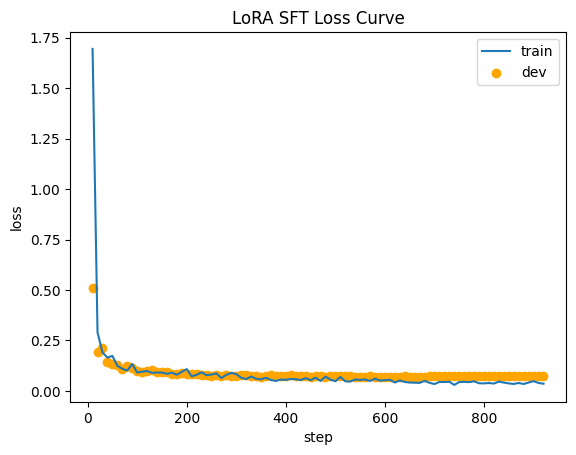

In [8]:
# %% —— 绘制 Loss 曲线 —— 
df = pd.read_csv(log_csv)

# train: 连续折线
plt.plot(df["step"], df["loss"], label="train")

# dev: 散点展示
dev_df = df.dropna(subset=["eval_loss"])
plt.scatter(dev_df["step"], dev_df["eval_loss"], color="orange", label="dev")

plt.xlabel("step")
plt.ylabel("loss")
plt.title("LoRA SFT Loss Curve")
plt.legend()
plt.show()


In [9]:
# %% --------- 合并 LoRA Adapter → 全量模型 并保存 ---------
from transformers import AutoModelForCausalLM
from peft import PeftModel
import os

# 1) 加载原始基座模型
base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_ID,
    cache_dir=HF_CACHE,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    trust_remote_code=True
)

# 2) 把训练好的 LoRA Adapter load 进来
model_with_adapter = PeftModel.from_pretrained(
    base_model,
    os.path.join(OUT_DIR, "final"),
    torch_dtype=torch.bfloat16
)

# 3) merge 并卸载 Adapter（释放显存）
merged_model = model_with_adapter.merge_and_unload()  
# merged_model 现在就是一个普通的 AutoModelForCausalLM

# 4) 保存 merged 模型和 tokenizer
save_dir = os.path.join(OUT_DIR, "merged")
os.makedirs(save_dir, exist_ok=True)
merged_model.save_pretrained(save_dir)
tokenizer.save_pretrained(save_dir)

print("✅ 全量模型已保存到:", save_dir)


✅ 全量模型已保存到: ./lora_ckpt3\merged


In [10]:
# %% --------- 加载 merged 模型 做推理 ---------
import torch

# 1) 重新加载 tokenizer & merged 模型
merged_dir = os.path.join(OUT_DIR, "merged")
tokenizer_merged = AutoTokenizer.from_pretrained(merged_dir, trust_remote_code=True)
model_merged     = AutoModelForCausalLM.from_pretrained(
    merged_dir,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    trust_remote_code=True
).eval()

# 2) 简易推理函数
def chat(prompt: str,
         max_new_tokens: int = 128,
         temperature: float = 0.7,
         top_p: float = 0.9,
         do_sample: bool = True) -> str:
    """
    输入 prompt（字符串），返回 merged 模型生成的回答。
    """
    inputs = tokenizer_merged(prompt, return_tensors="pt").to(model_merged.device)
    with torch.no_grad():
        out_ids = model_merged.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=temperature,
            top_p=top_p,
            do_sample=do_sample
        )[0]
    return tokenizer_merged.decode(out_ids, skip_special_tokens=True)

# 3) 几个示例：你可以改成你的医学测试样本
examples = [
    "根据以下对话判断患者是否存在症状。\n患者：我头疼得厉害。\n助手:",
    "请用一句话解释什么是 LoRA 技术。\n助手:",
    "写一个汤加平衡饮食的建议。\n助手:",
]

for ex in examples:
    print("🔹 Prompt:", ex)
    print("🗣️ Response:", chat(ex))
    print("—" * 40)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


🔹 Prompt: 根据以下对话判断患者是否存在症状。
患者：我头疼得厉害。
助手:
🗣️ Response: 根据以下对话判断患者是否存在症状。
患者：我头疼得厉害。
助手: 当前对话中的患者存在症状：
头疼：厉害
————————————————————————————————————————
🔹 Prompt: 请用一句话解释什么是 LoRA 技术。
助手:
🗣️ Response: 请用一句话解释什么是 LoRA 技术。
助手: LoRA 是一种自定义的机器学习模型，用于实现大规模文本生成。它使用了预训练的语言模型和注意力机制，并通过在大量数据上进行微调来提高其性能。LoRA 的目标是将语言生成任务从单个模型扩展到多模态任务。 LoRA（Large Scale Language Understanding with Recurrent Neural Networks）是一种自定义的机器学习模型，用于实现大规模文本生成。它使用了预训练的语言模型和注意力机制，并通过在大量数据上进行微调来提高其性能。LoRA的目标是将语言生成任务从单个模型扩展到多模
————————————————————————————————————————
🔹 Prompt: 写一个汤加平衡饮食的建议。
助手:
🗣️ Response: 写一个汤加平衡饮食的建议。
助手: 当前在汤加，我无法回答您的问题。汤加是位于南美洲的一个岛国，其领土包括安第斯山脉和太平洋中的多个岛屿。

汤加是一个小国家，面积约为1,892平方千米，位于南美洲的南部沿海地区。该国以咖啡、香蕉、芒果等热带水果为主食，并且也有部分玉米、甘蔗等其他农作物的种植。此外，汤加还是该地区的农业中心之一，同时也是咖啡生产的主要来源地之一。

汤加的文化传统包括传统的捕鱼活动、狩猎和放牧以及狩猎活动。当地居民通常会
————————————————————————————————————————


In [12]:
# %% —— 生成 dev 预测文件（prediction + gold） ——
import json
from datasets import load_dataset
from tqdm import tqdm   # 进度条，可选

DEV_PATH = "./dev_instruction_custom_v2.jsonl"   # ← 你的 dev 路径
OUT_PATH = "./predictions_dev.jsonl"                       # ← 输出文件

# 1. 读 dev 数据
dev_ds = load_dataset("json", data_files={"dev": DEV_PATH})["dev"]

# 2. 批量推理 & 写文件
with open(OUT_PATH, "w", encoding="utf-8") as fout:
    for ex in tqdm(dev_ds, desc="predict"):
        # 拼 prompt：instruction + '\n' + input + '\n助手:'
        prompt = ex["instruction"].strip()
        if ex.get("input"):
            prompt += "\n" + ex["input"].strip()
        prompt += "\n助手:"

        prediction = chat(prompt).strip()
        gold       = ex["output"].strip()

        fout.write(json.dumps({
            "prediction": prediction,
            "gold":       gold
        }, ensure_ascii=False) + "\n")

print(f"✅ 预测完成，文件写入: {OUT_PATH}")


Generating dev split: 0 examples [00:00, ? examples/s]

predict: 100%|██████████| 393/393 [02:31<00:00,  2.59it/s]

✅ 预测完成，文件写入: ./predictions_dev.jsonl


In [13]:
# %% —— 裁剪 prediction 前缀，只保留判断句 —— 
import json, re, os

IN_PATH  = "./predictions_dev.jsonl"          # 之前生成的
OUT_PATH = "./predictions_dev_trimmed.jsonl"  # 新文件，裁剪后

# 正则：匹配“助手:” 以及它前面的所有文本
ASSISTANT_RE = re.compile(r".*?助手:\s*", re.S)

# 如果已存在新文件，先删除
if os.path.exists(OUT_PATH): os.remove(OUT_PATH)

num_mod, num_total = 0, 0
with open(IN_PATH, "r", encoding="utf-8") as fin, \
     open(OUT_PATH, "w", encoding="utf-8") as fout:
    for line in fin:
        num_total += 1
        obj = json.loads(line)

        pred = obj["prediction"]

        # 1) 去掉 “助手:” 及其前面的所有
        trimmed = ASSISTANT_RE.sub("", pred).lstrip()

        # 2) 再找想保留的关键前缀（保证一定存在）
        KEY = "当前对话中的"
        if KEY in trimmed:
            trimmed = trimmed[trimmed.index(KEY):]
        else:
            # 若没找到关键字，保持原文
            trimmed = trimmed

        obj["prediction"] = trimmed
        fout.write(json.dumps(obj, ensure_ascii=False) + "\n")

        if trimmed != pred:
            num_mod += 1

print(f"✅ 裁剪完成：处理 {num_total} 条，修改 {num_mod} 条")
print(f"📄 输出文件：{OUT_PATH}")


✅ 裁剪完成：处理 393 条，修改 393 条
📄 输出文件：./predictions_dev_trimmed.jsonl


In [14]:
# %% —— Exact Match Accuracy ——
import json, numpy as np

JSON_PATH = "./predictions_dev_trimmed.jsonl"

preds, golds = [], []
with open(JSON_PATH, encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        preds.append(obj["prediction"].strip())
        golds.append(obj["gold"].strip())

exact = np.mean([p == g for p, g in zip(preds, golds)])
print(f"Exact-Match Accuracy: {exact:.4f}  (共 {len(preds)} 条)")


Exact-Match Accuracy: 0.5878  (共 393 条)


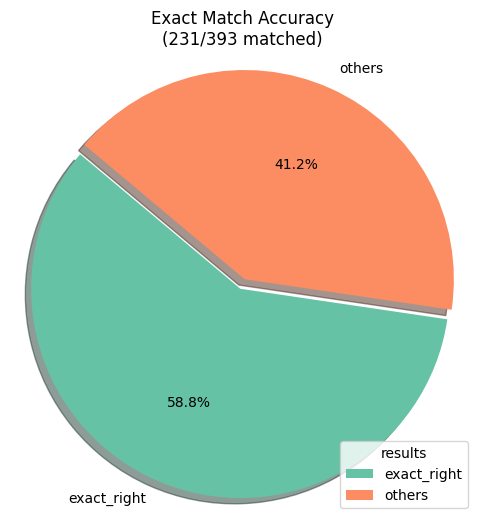

In [24]:
import json
import matplotlib.pyplot as plt

# 读取数据路径
json_path = "./predictions_dev_trimmed.jsonl"

# 读取 prediction 和 gold
preds, golds = [], []
with open(json_path, encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        preds.append(obj["prediction"].strip())
        golds.append(obj["gold"].strip())

# 统计匹配情况
matches = [p == g for p, g in zip(preds, golds)]
correct = sum(matches)
total = len(matches)
incorrect = total - correct

# 画饼图
labels = ['exact_right', 'others']
sizes = [correct, incorrect]
colors = ['#66c2a5', '#fc8d62']
explode = (0.05, 0)  # 突出显示第一个部分

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=140, colors=colors
)

plt.title(f"Exact Match Accuracy\n({correct}/{total} matched)")
plt.axis('equal')  # 保证饼图为圆形

# 正确显示颜色图标对应标签
plt.legend(wedges, labels, title="results", loc="lower right")
plt.show()



In [25]:
# %% —— 读取裁剪后的预测文件 —— 
import json, pandas as pd

JSON_PATH = "./predictions_dev_trimmed.jsonl"   # ← 改成你的路径

preds, golds = [], []
with open(JSON_PATH, encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        preds.append(obj["prediction"].strip())
        golds.append(obj["gold"].strip())

print(f"Loaded {len(preds)} examples")


Loaded 393 examples


In [26]:
# %% —— Exact-Match Accuracy —— 
import numpy as np

exact = np.mean([p == g for p, g in zip(preds, golds)])
print(f"Exact-Match Accuracy: {exact:.4f}")


Exact-Match Accuracy: 0.5878


Macro-Precision: 0.3092  Macro-Recall: 0.3100  Macro-F1: 0.3053


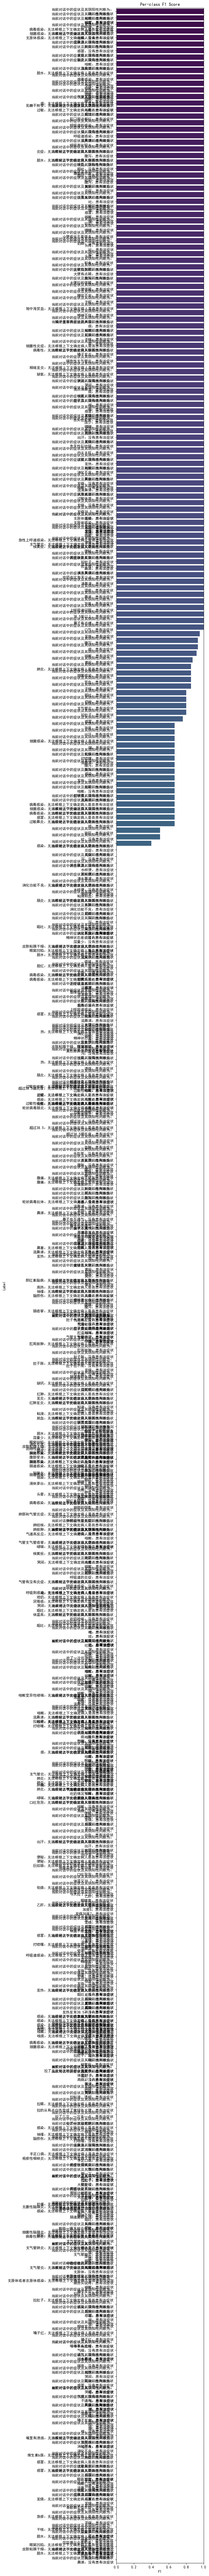

In [28]:
# %% —— Macro Precision / Recall / F1 & per-class F1 bar —— 
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# 如果有中文字体，把下面改成你的字体；否则注释掉
plt.rcParams['font.sans-serif'] = ['SimHei']   # 显示中文
plt.rcParams['axes.unicode_minus'] = False

labels = sorted(list(set(golds) | set(preds)))

prec, rec, f1, support = precision_recall_fscore_support(
    golds, preds, labels=labels, zero_division=0
)
macro_prec, macro_rec, macro_f1, _ = precision_recall_fscore_support(
    golds, preds, average='macro', zero_division=0
)

print(f"Macro-Precision: {macro_prec:.4f}  Macro-Recall: {macro_rec:.4f}  Macro-F1: {macro_f1:.4f}")

# —— per-class F1 条形图 —— 
f1_df = pd.DataFrame({'Label': labels, 'F1': f1, 'Support': support})
f1_df = f1_df.sort_values('F1', ascending=False)

plt.figure(figsize=(8, max(4, 0.25*len(labels))))
sns.barplot(data=f1_df, x='F1', y='Label', palette='viridis')
plt.title("Per-class F1 Score")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


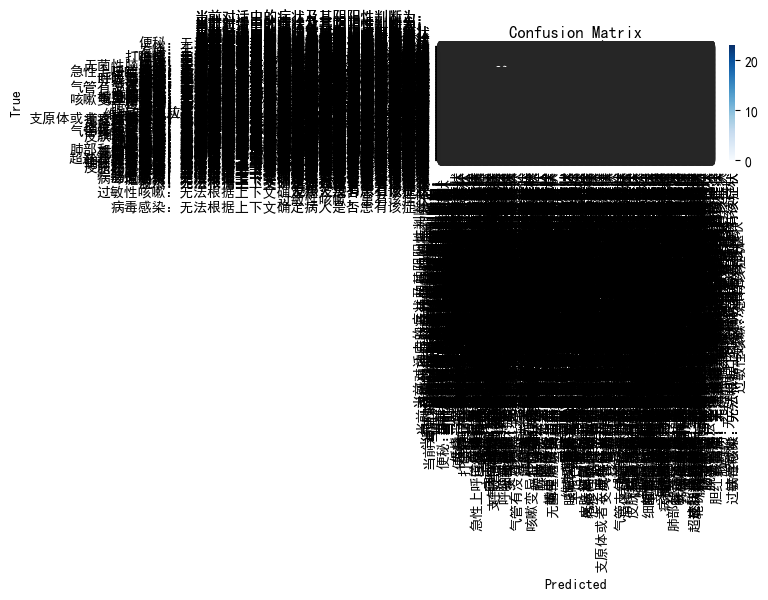

In [29]:
# %% —— Confusion Matrix —— 
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(golds, preds, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [31]:
import json
import csv

# Paths
INPUT_PATH = "./predictions_dev_trimmed.jsonl"
OUTPUT_CSV = "./entity_judgments_wide.csv"

def parse_entity_judgments(text):
    """
    Parse entities and judgments from a trimmed prediction/gold text.
    """
    lines = text.splitlines()
    results = {}
    for line in lines:
        if line.startswith("当前对话"):
            continue
        if "：" in line:
            entity, judgment = line.split("：", 1)
            results[entity.strip()] = judgment.strip()
    return results

# Read all samples and collect entity lists
all_samples = []
max_entities = 0
with open(INPUT_PATH, encoding="utf-8") as fin:
    for line in fin:
        obj = json.loads(line)
        pred_map = parse_entity_judgments(obj["prediction"])
        gold_map = parse_entity_judgments(obj["gold"])
        # Union of entities
        entities = sorted(set(pred_map.keys()) | set(gold_map.keys()))
        sample_entries = []
        for ent in entities:
            sample_entries.append((ent,
                                   pred_map.get(ent, ""),
                                   gold_map.get(ent, "")))
        all_samples.append(sample_entries)
        if len(sample_entries) > max_entities:
            max_entities = len(sample_entries)

# Prepare CSV header
header = []
for i in range(max_entities):
    header.extend([f"entity{i+1}", f"pred{i+1}", f"gold{i+1}"])

# Write wide-format CSV
with open(OUTPUT_CSV, "w", newline="", encoding="utf-8") as fout:
    writer = csv.writer(fout)
    writer.writerow(header)
    for sample in all_samples:
        row = []
        for ent, pred, gold in sample:
            row.extend([ent, pred, gold])
        # Pad missing columns
        missing = max_entities - len(sample)
        row.extend(["", ""] * missing)  # pad entity,pred,gold groups
        writer.writerow(row)

print(f"✅ Wide CSV written to {OUTPUT_CSV}")


✅ Wide CSV written to ./entity_judgments_wide.csv


In [32]:
import json
import csv

INPUT_PATH = "./predictions_dev_trimmed.jsonl"   # 已上传的文件
OUT_PATH   = "./entity_sets.csv"                 # 输出文件

def parse_entities(text: str) -> list:
    """提取实体列表（忽略判断结果）"""
    ents = []
    for line in text.splitlines():
        if line.startswith("当前对话"):
            continue
        if "：" in line:
            ent = line.split("：", 1)[0].strip()
            ents.append(ent)
    return ents

with open(INPUT_PATH, encoding="utf-8") as fin, \
     open(OUT_PATH,  "w", newline="", encoding="utf-8") as fout:
    
    writer = csv.writer(fout)
    writer.writerow(["sample_id", "pred_entities", "gold_entities"])
    
    for idx, line in enumerate(fin):
        obj = json.loads(line)
        pred_ents = parse_entities(obj["prediction"])
        gold_ents = parse_entities(obj["gold"])
        
        writer.writerow([idx,
                         "|".join(pred_ents),
                         "|".join(gold_ents)])

print(f"✅ 已生成实体列表文件: {OUT_PATH}")


✅ 已生成实体列表文件: ./entity_sets.csv


In [33]:
# %% —— 逐实体对齐：pred vs gold —— 
import json, csv, os, re

# ===== 路径 =====
JSON_PATH = "./predictions_dev_trimmed.jsonl"     # ← 你的裁剪后文件
CSV_PATH  = "./entity_judgments_long.csv"         # 输出

# ===== 工具：提取实体 → 判断 =====
def parse_entity_map(text: str) -> dict:
    """
    返回 dict{实体: 判断}，忽略标题行
    “实体名”取“第一個中文或英文冒号前的内容”
    """
    results = {}
    for line in text.splitlines():
        if line.startswith("当前对话"):   # 跳标题
            continue
        # 允许全角/半角冒号
        if "：" in line or ":" in line:
            ent, judg = re.split("：|:", line, maxsplit=1)
            results[ent.strip()] = judg.strip()
    return results

# ===== 读取文件，一行行处理 =====
with open(JSON_PATH, encoding="utf-8") as fin, \
     open(CSV_PATH,  "w", newline="", encoding="utf-8") as fout:
    
    writer = csv.writer(fout)
    writer.writerow(["sample_id", "entity", "pred_judgment",
                     "gold_judgment", "match"])
    
    for idx, line in enumerate(fin):
        obj = json.loads(line)
        pred_map = parse_entity_map(obj["prediction"])
        gold_map = parse_entity_map(obj["gold"])
        
        # 并集：保证所有实体都列出
        all_entities = sorted(set(pred_map) | set(gold_map))
        
        for ent in all_entities:
            pred_j = pred_map.get(ent, "")
            gold_j = gold_map.get(ent, "")
            match  = int( (pred_j != "") and (pred_j == gold_j) )
            
            writer.writerow([idx, ent, pred_j, gold_j, match])

print(f"✅ 已生成：{CSV_PATH}（每行 = 一个实体）")


✅ 已生成：./entity_judgments_long.csv（每行 = 一个实体）


In [34]:
import pandas as pd
df = pd.read_csv("entity_judgments_long.csv")
entity_acc = df["match"].mean()
print("实体 + 判断整体准确率：", entity_acc)


实体 + 判断整体准确率： 0.56071964017991


In [35]:
import json
import pandas as pd
import os

# === 配置 ===
FILENAME = './predictions_dev_trimmed copy.jsonl'   # ← 根据实际路径改一下
OUTPUT   = 'entity_accuracy_analysis.csv'                  # 最终 CSV 名
POLARITIES = [
    "患有该症状",
    "没有患有该症状",
    "无法根据上下文确定病人是否患有该症状",
]

def extract_pairs(text: str):
    """
    把整段 prediction/gold 文本 -> [(实体, 极性), ...]
    规则：
      1) 去掉空行 & 开头那句说明
      2) 每行标准形如：<实体> ： <极性>
      3) 支持全角/半角冒号，极性只保留三种合法写法
    """
    if not text:
        return []

    # 逐行、去空白
    lines = [ln.strip() for ln in text.splitlines() if ln.strip()]

    # 如果第一行是“当前对话中的症状及其阴阳性判断为：”，就丢掉
    if lines and "症状及其阴阳性判断" in lines[0]:
        lines = lines[1:]

    pairs = []
    for ln in lines:
        ln = ln.replace('：', ':', 1)        # 先把全角冒号变半角，方便 split
        if ':' not in ln:
            continue                        # 极端情况跳过格式异常行
        entity, polarity = [x.strip() for x in ln.split(':', 1)]

        # 只保留三类合法极性（匹配到就截断成标准写法）
        for p in POLARITIES:
            if polarity.startswith(p):
                polarity = p
                break

        pairs.append((entity, polarity))
    return pairs

# === 主循环：逐行读取 JSONL，提取实体/极性并拼成行 ===
rows = []
with open(FILENAME, "r", encoding="utf-8") as f:
    for idx, line in enumerate(f):
        data = json.loads(line)
        pred_pairs = extract_pairs(data.get("prediction", ""))
        gold_pairs = extract_pairs(data.get("gold", ""))

        # 统一行宽：按 max(预测实体数, 标注实体数) 填充
        max_len = max(len(pred_pairs), len(gold_pairs))
        row = {"id": idx}

        for i in range(max_len):
            # 预测
            if i < len(pred_pairs):
                row[f"pred实体{i+1}"] = pred_pairs[i][0]
                row[f"pred症状{i+1}"] = pred_pairs[i][1]
            else:
                row[f"pred实体{i+1}"] = ""
                row[f"pred症状{i+1}"] = ""

            # 标注
            if i < len(gold_pairs):
                row[f"gold实体{i+1}"] = gold_pairs[i][0]
                row[f"gold症状{i+1}"] = gold_pairs[i][1]
            else:
                row[f"gold实体{i+1}"] = ""
                row[f"gold症状{i+1}"] = ""

        rows.append(row)

# === 保存并简单预览 ===
df = pd.DataFrame(rows)
df.to_csv(OUTPUT, index=False, encoding="utf-8-sig")  # utf-8-sig 方便 Excel 直接打开
print(f"✅ 已生成 CSV：{OUTPUT}  (shape={df.shape})")
df.head()


JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)